In [138]:
from datetime import datetime
import pandas as pd

In [139]:
datetime.now()

datetime.datetime(2023, 10, 25, 22, 34, 8, 927187)

In [140]:
#ASSIGNMENT PANDAS DATETIME BASIC
#import cas of transaction
trans = pd.read_csv('transactions.csv')
trans

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [141]:
#convert date to datetimes
trans['date'] = pd.to_datetime(
    trans['date'],
    errors='coerce',
    infer_datetime_format=True
    #format = '%Y-%B-%d'
)

In [142]:
#check dtypes
trans.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

In [134]:
trans

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [135]:
#create a column representing time difference of now and the data 
#extract month, year, and weekday from date
#format date to %Y-%B-%d
trans = trans.assign(
    date = trans['date'].dt.strftime('%Y-%B-%d'),
    time_to_last_date = trans['date'].max() - trans['date'],
    year = trans['date'].dt.year,
    month = trans['date'].dt.month,
    day_of_week = trans['date'].dt.dayofweek
)

trans

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2
...,...,...,...,...,...,...,...
83483,2017-August-15,50,2804,0 days,2017,8,1
83484,2017-August-15,51,1573,0 days,2017,8,1
83485,2017-August-15,52,2255,0 days,2017,8,1
83486,2017-August-15,53,932,0 days,2017,8,1


In [80]:
#ASSIGNMENT TIME DELTAS
trans.assign(
    time_to_last_date = (pd.to_timedelta(3, unit='W')) + trans['time_to_last_date'],
    weeks_to_last_date = (lambda x: x['time_to_last_date'].dt.days / 7 )
)





,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week,weeks_to_last_date
0,2013-January-01,25,770,1708 days,2013,1,1,244.000000
1,2013-January-02,1,2111,1707 days,2013,1,2,243.857143
2,2013-January-02,2,2358,1707 days,2013,1,2,243.857143
3,2013-January-02,3,3487,1707 days,2013,1,2,243.857143
4,2013-January-02,4,1922,1707 days,2013,1,2,243.857143
...,...,...,...,...,...,...,...,...
83483,2017-August-15,50,2804,21 days,2017,8,1,3.000000
83484,2017-August-15,51,1573,21 days,2017,8,1,3.000000
83485,2017-August-15,52,2255,21 days,2017,8,1,3.000000
83486,2017-August-15,53,932,21 days,2017,8,1,3.000000


In [136]:
trans.dtypes

date                          object
store_nbr                      int64
transactions                   int64
time_to_last_date    timedelta64[ns]
year                           int64
month                          int64
day_of_week                    int64
dtype: object

In [83]:
#ASSIGNMENT MISSING TIME SERIES DATA 
#load oil file first

oil = pd.read_csv('../oil.csv',
                 index_col = 'date',
                 parse_dates = True)

oil

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


In [85]:
#mean with missing values
oil.mean()

dcoilwtico    67.714366
dtype: float64

In [88]:
#mean with forward fill
oil.ffill().mean()

dcoilwtico    67.671249
dtype: float64

In [90]:
#mean with backward fill
oil.bfill().mean()

dcoilwtico    67.673325
dtype: float64

In [92]:
#mean with interpolation
oil.interpolate().mean()

dcoilwtico    67.661824
dtype: float64

<Axes: xlabel='date'>

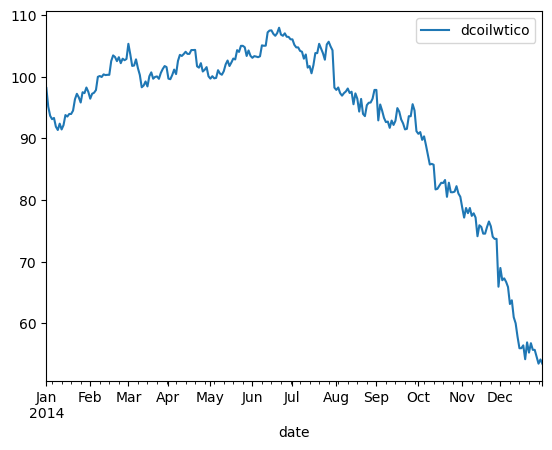

In [100]:
#plot series with ffill year 2014
oil.ffill().loc['2014'].plot()

<Axes: xlabel='date'>

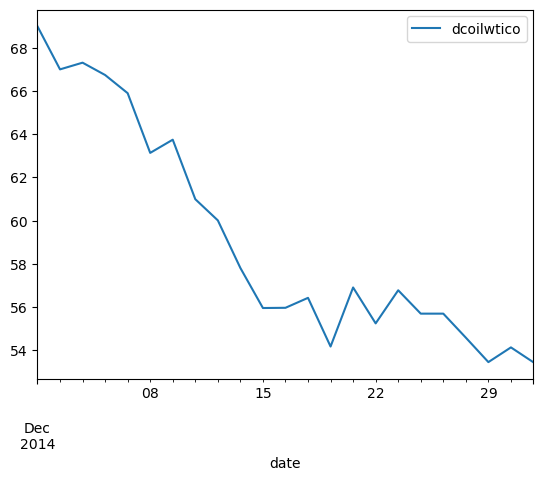

In [102]:
#plot series with ffill year 2014
oil.ffill().loc['2014-12'].plot()

<Axes: xlabel='date'>

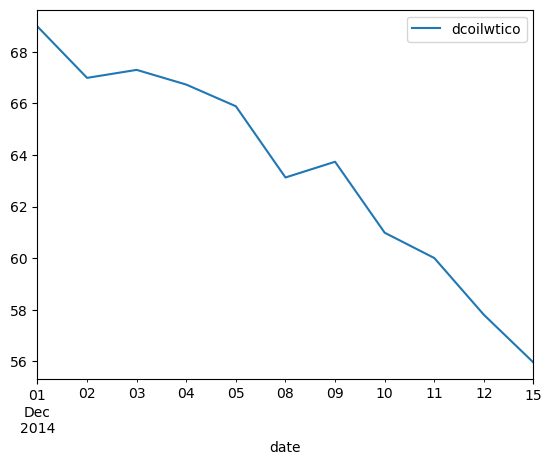

In [104]:
#plot series with ffill year 2014
oil.ffill().loc['2014-12-01':'2014-12-15'].plot()

In [106]:
#ASSIGNMENT SHIFT AND DIFF
trans


,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2
...,...,...,...,...,...,...,...
83483,2017-August-15,50,2804,0 days,2017,8,1
83484,2017-August-15,51,1573,0 days,2017,8,1
83485,2017-August-15,52,2255,0 days,2017,8,1
83486,2017-August-15,53,932,0 days,2017,8,1


In [114]:
#group by year and month
agg47 = trans[trans['store_nbr'] == 47].groupby(['year','month']).agg({'transactions' : 'sum'})
agg47

transactions
year month              
2013 1            109668
     2            103706
     3            116873
     4            108571
     5            113532
     6            110637
     7            107506
     8            112001
     9            114468
     10           114585
     11           114436
     12           150204
2014 1            114190
     2            107175
     3            121771
     4            122976
     5            126298
     6            118398
     7            118522
     8            121949
     9            115552
     10           116741
     11           116996
     12           147371
2015 1            118445
     2            108186
     3            119883
     4            118449
     5            120810
     6            110814
     7            116234
     8            119307
     9            112975
     10           117712
     11           117564
     12           149747
2016 1            108521
     2            111132
     3            116599
     4            117046
     5            115799
     6            108539
     7            114724
     8            114185
     9            112026
     10           116242
     11           118587
     12           149367
2017 1            118000
     2            109254
     3            119122
     4            119174
     5            120941
     6            114171
     7            120588
     8             57541

In [117]:
agg47 = agg47.assign( year_prior = agg47['transactions'].shift(12))
agg47

transactions  year_prior
year month                          
2013 1            109668         NaN
     2            103706         NaN
     3            116873         NaN
     4            108571         NaN
     5            113532         NaN
     6            110637         NaN
     7            107506         NaN
     8            112001         NaN
     9            114468         NaN
     10           114585         NaN
     11           114436         NaN
     12           150204         NaN
2014 1            114190    109668.0
     2            107175    103706.0
     3            121771    116873.0
     4            122976    108571.0
     5            126298    113532.0
     6            118398    110637.0
     7            118522    107506.0
     8            121949    112001.0
     9            115552    114468.0
     10           116741    114585.0
     11           116996    114436.0
     12           147371    150204.0
2015 1            118445    114190.0
     2            108186    107175.0
     3            119883    121771.0
     4            118449    122976.0
     5            120810    126298.0
     6            110814    118398.0
     7            116234    118522.0
     8            119307    121949.0
     9            112975    115552.0
     10           117712    116741.0
     11           117564    116996.0
     12           149747    147371.0
2016 1            108521    118445.0
     2            111132    108186.0
     3            116599    119883.0
     4            117046    118449.0
     5            115799    120810.0
     6            108539    110814.0
     7            114724    116234.0
     8            114185    119307.0
     9            112026    112975.0
     10           116242    117712.0
     11           118587    117564.0
     12           149367    149747.0
2017 1            118000    108521.0
     2            109254    111132.0
     3            119122    116599.0
     4            119174    117046.0
     5            120941    115799.0
     6            114171    108539.0
     7            120588    114724.0
     8             57541    114185.0

In [119]:
#now choose 2015 so it shows 2 column 2015' trns and 2014' trns (year prior)
agg47.loc[2015]


,transactions,year_prior
month,,
1,118445,114190.0
2,108186,107175.0
3,119883,121771.0
4,118449,122976.0
5,120810,126298.0
6,110814,118398.0
7,116234,118522.0
8,119307,121949.0
9,112975,115552.0


<Axes: xlabel='month'>

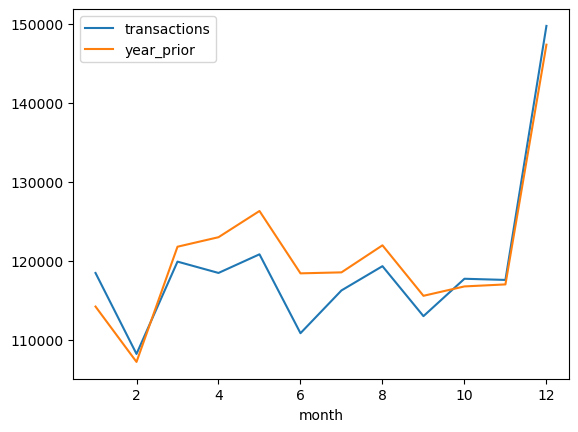

In [121]:
# plot it
agg47.loc[2015].plot()


In [156]:
#ASSIGNMENT RESAMPLING TIME SERIES
oil


,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


<Axes: xlabel='date'>

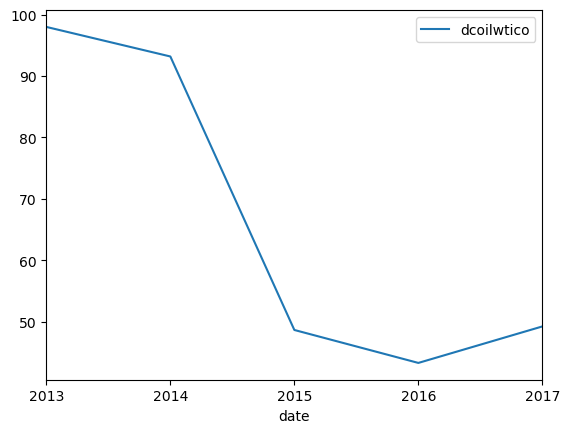

In [158]:
oil.resample('Y').mean().plot()

<Axes: xlabel='date'>

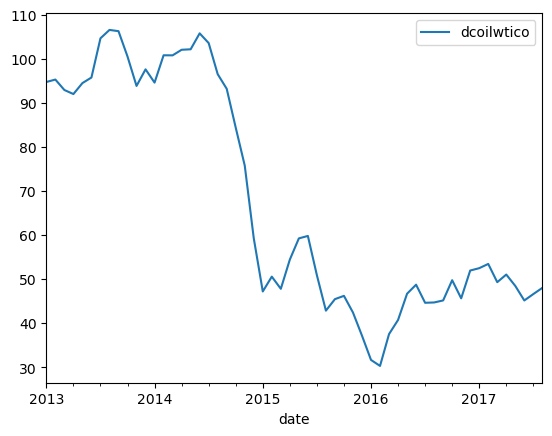

In [159]:
oil.resample('M').mean().plot()

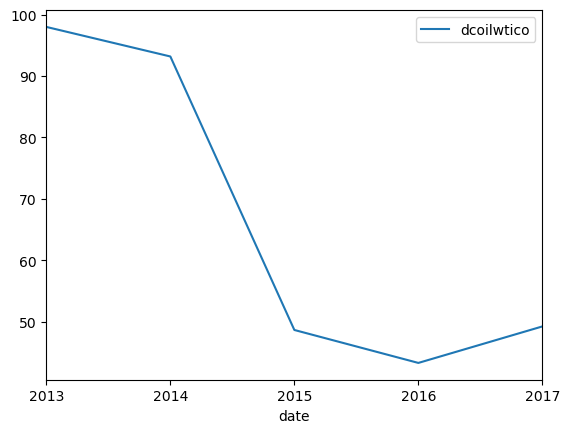

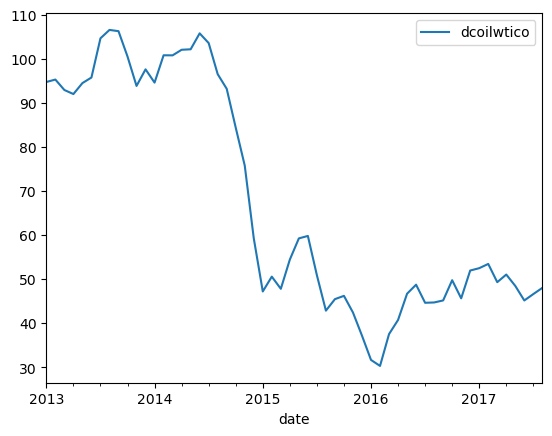

In [161]:
for period in ('Y','M'):
    oil.resample(period).mean().plot()

In [171]:
#ASSIGNMENT ROLLING AGGREGATION
roll47 = trans[trans['store_nbr'] == 47].set_index(['date'])
roll47

,store_nbr,transactions
date,,
2013-01-02,47,4161
2013-01-03,47,3660
2013-01-04,47,3915
2013-01-05,47,4764
2013-01-06,47,4935
...,...,...
2017-08-11,47,4009
2017-08-12,47,3825
2017-08-13,47,3741


In [1]:
#plot it
roll47.rolling(90).mean().plot(y='transactions')

NameError: name 'roll47' is not defined

In [ ]:
#THE END========================================================================================================================